In [77]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
import pandas as pd
import statistics
from scipy import stats, integrate

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

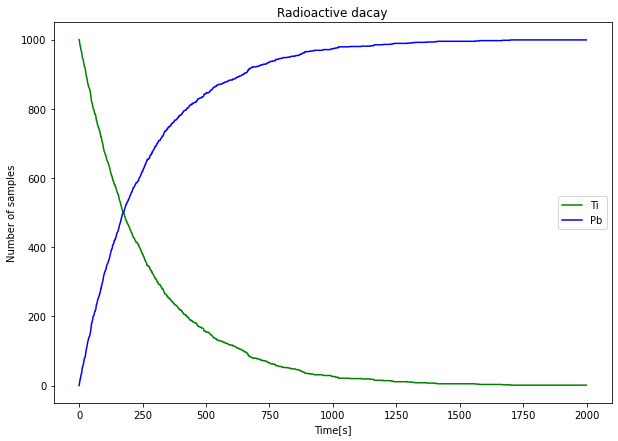

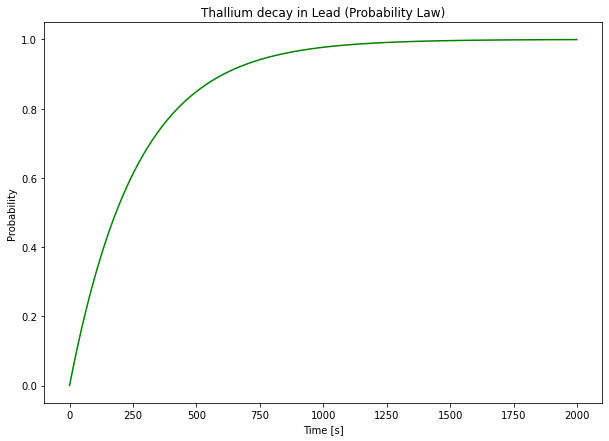

In [78]:
#Task 1

inter=2000 #times in seconds 
n=1000 
 
Ti_curr=np.ones(n) #1000 Thallium atoms

Pb_curr=np.zeros(n) #0 Lead atoms 

Ti_t=np.empty(inter)
Pb_t=np.empty(inter)

Ti_t[0]=np.sum(Ti_curr)
Pb_t[0]=np.sum(Pb_curr)

# Half life in seconds
tau=3.052*60 

for t in range (1,inter):
    for i in range(n):
        if (np.random.uniform()<=1.-2**(-1/tau)): # every time step
            Ti_curr[i]=0
            Pb_curr[i]=1
    Ti_t[t]=np.sum(Ti_curr)
    Pb_t[t]=np.sum(Pb_curr)


#Radioactive dacay 
plt.figure(figsize=(10,7))    
plt.plot(Ti_t,label='Ti',color='green')
plt.plot(Pb_t,label='Pb',color='blue')
plt.title("Radioactive dacay")
plt.legend()
plt.xlabel('Time[s]')
plt.ylabel('Number of samples')
plt.show()

#Probaility
x_d = np.linspace(0,len(Ti_t),len(Ti_t),endpoint=False)
y_d = np.exp2(-x_d/tau)
plt.figure(figsize=(10,7))
#plt.plot(x_d, y_d, label='Ti', color='green')
z_d = 1-np.exp2(-x_d/tau) 
plt.plot(x_d, z_d, color='green')
#plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Probability')
plt.title('Thallium decay in Lead (Probability Law)')
plt.show()

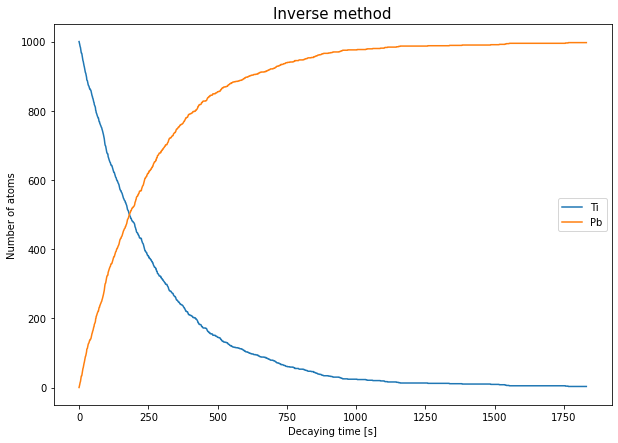

In [79]:

def icdf(p):
    return -tau*np.log2(1-p)


#inverse transform method
def inverse_transform(t):
    #From minute to seconds
    tho = 3.052*60
    return -tho * np.log(1-t)/np.log(2)

# Generate random times of decay using the inverse transform method
decay_times  = inverse_transform(np.random.random(1000))
decay_times.sort()

""""""
tl_count = []
pb_count = []

time = np.linspace(0,round(tau0*10), round(tau0*10)+1) #time steps of 1 for 10 half-lives

for t in time:
    tl_temp = 0
    for tr in decay_times:
        #if the simulated decay time is greater than the actual time then the atom has not decayed
        if tr>t:
            tl_temp = tl_temp + 1
    tl_count.append(tl_temp)
    pb_count.append(1000-tl_temp)  
    
plt.figure(figsize=(10,7))
plt.plot(tl_count,label='Ti')    
plt.plot(pb_count,label='Pb')
plt.title('Inverse method', fontsize=15)
plt.xlabel('Decaying time [s]')
plt.ylabel('Number of atoms')
plt.legend()




    



2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Result using the hit/miss method = 1.34296

Mean = 1.3467666666666667

Standard Deviation = 0.0035013429279136

Error of estimate= 0.003806666666666736

Result using the mean value method = 1.3467810173512538

Error of estimate = 1.4350684587105533e-05


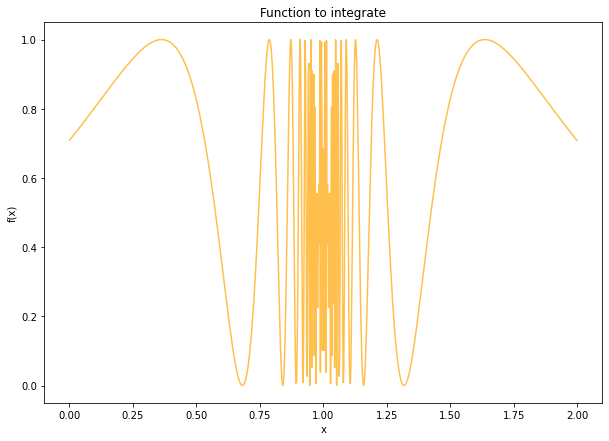

In [80]:
#Task 2

#Definition of the function to integrate
def f(x):
    return (np.sin(1. / (1 - x)))**2

x = np.linspace(0.001, 1.999, 1000)
plt.figure(figsize=(10,7))
plt.plot(x, f(x), 'orange', alpha=0.7)
plt.title('Function to integrate')
plt.xlabel('x')
plt.ylabel('f(x)')

#Hit/miss method

values = []
for i in range(30):
    N = 100000 #10000
    count = 0
    for i in range(N):
        x = 2 * np.random.random() 
        y = np.random.random()     
        if y < f(x): count += 1
        
    I1 = 2*count / N
    values.append(I1)
    
print("Result using the hit/miss method =", I1)

mu = statistics.mean(values)
sigma = statistics.stdev(values)
print('\nMean =', mu)
print('\nStandard Deviation =', sigma)
print('\nError of estimate=', abs(I1-mu))

#Mean value method

Ν = 100000 #number of random points to generate
a = 0 #limits given by the text of the task --- between 0 and 2
b = 2
x = np.random.uniform(a, b, Ν)
I2 = np.mean(f(x)*(b-a))

print('\nResult using the mean value method =', I2)
print('\nError of estimate =', abs(I2-mu))


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [81]:
#Task 3

np.random.seed(123)
#define the function to integrate for arbitrary dimensions
def f(x):                  
    r2 = np.sum(x**2)  #calculate sum of squared coordinates
    if r2 <= 1: return 1
    else: return 0

#function that calculates the integral of the function f with the hit and miss method 

def integral_dsphere(f, a, b, d, N):
    x = np.random.uniform(a, b, size = (N,d))
    counter = 0
    for i in range(len(x)): counter += f(x[i])
    Id = (b-a)**d * counter / N
    return Id
    
#number of random points to generate chosen dimension
N = 10**6

#integration domain
a = -1
b = 1

#2D
d = 2
I2 = integral_dsphere(f, a, b, d, N)


#10D
d = 10
I10 = integral_dsphere(f, a, b, d, N)

print('The area of a 2D sphere- unit circle is:', I2)
print('Error: ', abs(np.pi-I2))
print('The hyper-volume of a 10D sphere with radius 1 is:', I10)
#np.pi**5/(120)  # Integral #ili 2.550
#print('Error: ', abs(np.pi**5/(120) -I2))

The area of a 2D sphere- unit circle is: 3.145684
Error:  0.004091346410207031
The hyper-volume of a 10D sphere with radius 1 is: 2.557952


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [82]:
#Task 4

exp=0.84
N=1000000

#Definition of the weight function
def w(x):
    return x**(-1/2)

#Definition of the function to integrate
def fun(x):
    return x**(-1/2)/(np.exp(x)+1)

#integration limits
a,b = 0, 1

# Calculating the true value of the integral so we can compare to it
In_true, error = integrate.quad(fun,a,b)
print("True integral:", In_true)

#Generating N random samples from the interval [0,1]
x=np.random.random(N)**2
V=2

#Integration with importance sampling: 
In=1/N*np.sum(fun(x)/w(x))*V

print('Sampling Method:', In)
print('Expected value is around 0.84')
print("Error: ", np.abs(In-In_true))

True integral: 0.8389329600133792
Sampling Method: 0.8388574065994914
Expected value is around 0.84
Error:  7.55534138878744e-05
